Low discrepancy sequences

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def f(x):
    pi_d_2_d = np.pi / 2. * x
    return np.sin(pi_d_2_d) * np.cos(pi_d_2_d) * np.exp(-np.sin(pi_d_2_d)**2)

int_f_0_1_wolfram_alpha = (np.e - 1.) / (np.e * np.pi)

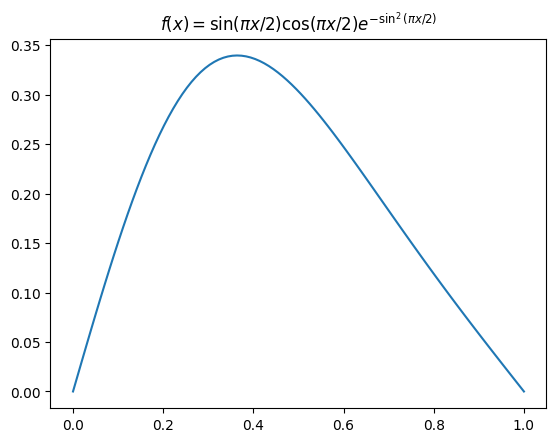

In [18]:
x = np.linspace(0, 1, 100)
plt.title("$f(x) = \sin(\pi x / 2) \cos(\pi x / 2) e^{-\sin^2(\pi x / 2)}$")
plt.plot(x, f(x))

Quasi-Monte Carlo and Monte Carlo

In [19]:
def qmc(f, ts):
    fs = [f(t) for t in ts]
    return np.mean(fs)

def mq(f, n, k=1):
    return np.mean([qmc(f, np.random.uniform(0, 1, n)) for _ in range(k)])


In [20]:
def corput(n: int, b: int) -> float:
    """
    Compute the n-th term of the van der Corput sequence in base b.
    """
    n_inv = 0.
    b_inv = 1. / b
    while n > 0:
        n_inv += (n % b) * b_inv
        n //= b
        b_inv /= b
    return n_inv

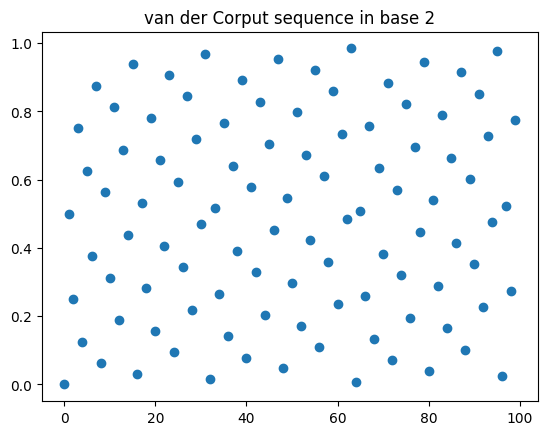

In [21]:
xs = np.arange(0, 100)
ys = [corput(n, 2) for n in xs]
plt.title("van der Corput sequence in base 2")
plt.plot(xs, ys, 'o')
plt.savefig("img/corput.png")

In [22]:
def halton_sequence(b: int) -> float:
    """Generator function for Halton sequence."""
    n, d = 0, 1
    while True:
        x = d - n
        if x == 1:
            n = 1
            d *= b
        else:
            y = d // b
            while x <= y:
                y //= b
            n = (b + 1) * y - x
        yield n / d

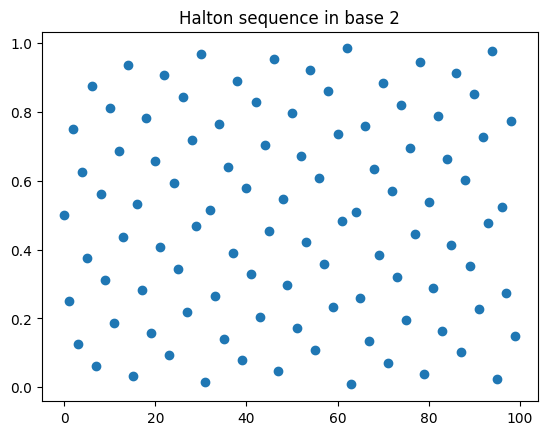

In [23]:
n = 100
g = halton_sequence(2)
ys = np.array([next(g) for _ in range(n)])
plt.title("Halton sequence in base 2")
plt.plot(xs, ys, 'o')
plt.savefig("img/halton.png")

In [24]:
N = 1000

In [25]:
def calc_errors(method, f, N):
    errors = []
    for n in range(10, N):
        errors.append(abs(method(f, n) - int_f_0_1_wolfram_alpha))
    return errors

In [26]:
mc_e = calc_errors(mq, f, N)
mc_e_10 = calc_errors(lambda f, n: mq(f, n, 10), f, N)

In [27]:
qmc_corput_e = calc_errors(lambda f, n: qmc(f, [corput(i, 2) for i in range(n)]), f, N)

In [28]:
g = halton_sequence(2)
qmc_halton_e = calc_errors(lambda f, n: qmc(f, [next(g) for _ in range(n)]), f, N)

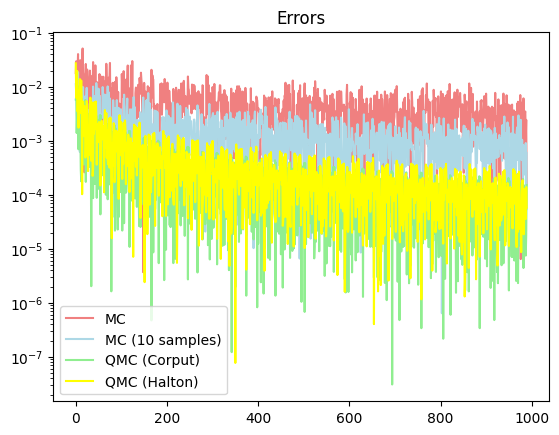

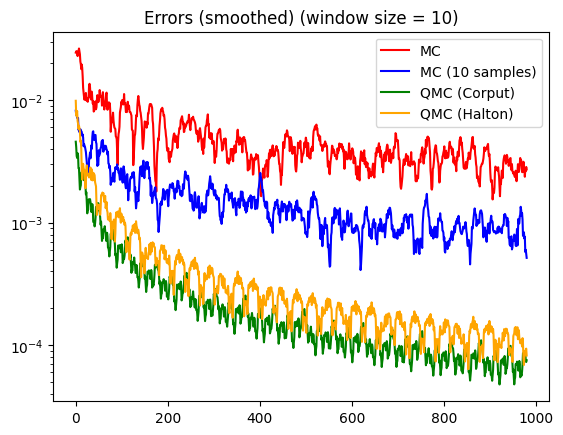

In [29]:
# Plot the errors
def smooth(err):
    return np.convolve(err, np.ones(10) / 10, mode='valid')

plt.title("Errors")

plt.plot(mc_e, label="MC", color="lightcoral")
plt.plot(mc_e_10, label="MC (10 samples)", color="lightblue")
plt.plot(qmc_corput_e, label="QMC (Corput)", color="lightgreen")
plt.plot(qmc_halton_e, label="QMC (Halton)", color="yellow")

plt.yscale("log")
plt.legend()
plt.savefig("img/errors.png")
plt.show()

plt.title("Errors (smoothed) (window size = 10)")

plt.plot(smooth(mc_e), label="MC", color="red")
plt.plot(smooth(mc_e_10), label="MC (10 samples)", color="blue")
plt.plot(smooth(qmc_corput_e), label="QMC (Corput)", color="green")
plt.plot(smooth(qmc_halton_e), label="QMC (Halton)", color="orange")

plt.yscale("log")
plt.legend()
plt.savefig("img/errors_smoothed.png")
plt.show()